In [43]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Geneate synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2) # Two features: visit duration and pages visited
print(features)

# astype(int) is use to truncate the value to integer typr
labels = (features[:,0] + features[:, 1] > 1).astype(int)   # Purchase (1) or (0) not
print(labels)

df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels    


[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.12019656]
 [0.2961402  0.11872772]


In [44]:
from sklearn.model_selection import train_test_split


# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)



In [46]:
# Biuld and train neural networl

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),   # Input layer with two features
    Dense(1, activation='sigmoid',)    # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)




Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.5464 - loss: 0.7149
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.5785 - loss: 0.7062
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.5913 - loss: 0.7017
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.5173 - loss: 0.7066
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5485 - loss: 0.6992
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5270 - loss: 0.6969
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.5331 - loss: 0.6925
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.5706 - loss: 0.6898
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.7476 - loss: 0.6868
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8302 - loss: 0.6833


In [48]:
# Evaluate the loss 

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.6805 
Test Accuracy: 0.8500000238418579


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8261 - loss: 0.6815 - val_accuracy: 0.9062 - val_loss: 0.6714
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.6781 - val_accuracy: 0.8750 - val_loss: 0.6672
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.6808 - val_accuracy: 0.8750 - val_loss: 0.6643
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8830 - loss: 0.6710 - val_accuracy: 0.8750 - val_loss: 0.6603
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7659 - loss: 0.6735 - val_accuracy: 0.8750 - val_loss: 0.6572
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8317 - loss: 0.6713 - val_accuracy: 0.8750 - val_loss: 0.6543
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8732 - loss: 0.6656 - val_accuracy: 0.8125 - val_loss: 0.6504
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8157 - loss: 0.6627 - val_accuracy: 0.8125 - val_loss:

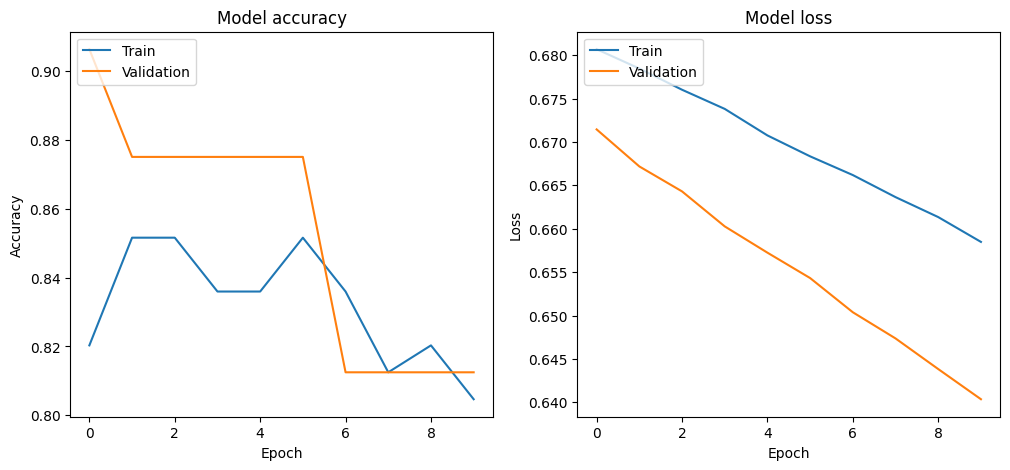

In [49]:

# Visualize trainning process
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


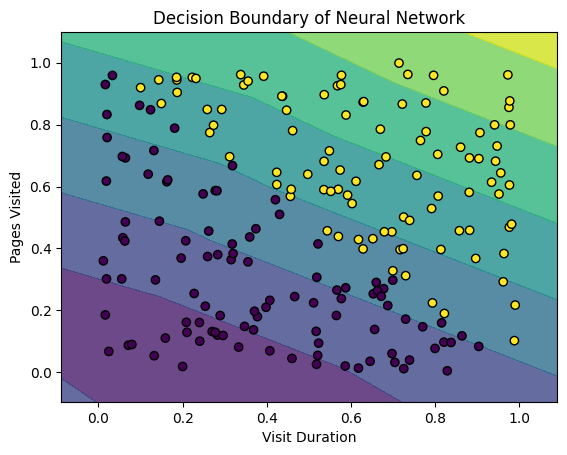

In [50]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()